https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

https://geohub.lacity.org/maps/19d2bcfd18054942bda2c95b47bf1927_146/about

what questions do we want to answer? Where to put police stations and some sort of prediction?

Did I do the lat / long right on the x and y axis?

How do we want to break it up? The final 10 pages does not include our code right?

How do we want to clean the data?

In [109]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [120]:
#DATA CLEANING CELL
my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
print(len(my_data.columns))
print(len(my_data))
my_data = my_data.drop(columns=['Vict Descent','Status','Status Desc'])

# print(len(my_data.columns))
all_c = list(my_data.columns)
final = []
for i in all_c:
    if 'Crm' not in i:
        final.append(i)
final.append('Crm Cd 1')
# print(len(final))
my_data.dropna(inplace=True,subset=final)
# my_data = my_data[my_data['LON'] != 0]
# my_data = my_data[my_data['LAT'] != 0]

print(len(my_data))

28
825212
67385


In [51]:
# my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# print(len(my_data))
# my_data.dropna(inplace=True)
# print(len(my_data))

In [52]:
# my_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
# all_c = list(my_data.columns)
# final = []
# print(len(all_c))
# for i in all_c:
#     if 'Crm' not in i:
#         final.append(i)
# final.append('Crm Cd 1')
# print(len(final))

# my_data.dropna(inplace=True,subset=final)
# print(len(my_data))


In [53]:
# print(all_c)

In [71]:
my_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Weapon Used Cd,Weapon Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
10,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,306.0,ROCK/THROWN OBJECT,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648
17,200506268,02/22/2020 12:00:00 AM,02/22/2020 12:00:00 AM,1900,5,Harbor,511,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",440.0,624.0,NaN,NaN,PACIFIC COAST,VERMONT,33.7926,-118.3043
19,200100535,01/14/2020 12:00:00 AM,01/14/2020 12:00:00 AM,1330,1,Central,152,1,210,ROBBERY,...,204.0,FOLDING KNIFE,210.0,NaN,NaN,NaN,7TH,HILL,34.0463,-118.2550
27,200100552,01/19/2020 12:00:00 AM,01/19/2020 12:00:00 AM,2000,1,Central,111,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,ALAMEDA,LOS ANGELES,34.0578,-118.2371
34,200100568,01/27/2020 12:00:00 AM,01/27/2020 12:00:00 AM,1500,1,Central,166,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,930.0,998.0,NaN,NaN,6TH,SAN JULIAN,34.0428,-118.2461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825103,230616011,10/03/2023 12:00:00 AM,10/03/2023 12:00:00 AM,1055,6,Hollywood,657,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,207.0,OTHER KNIFE,230.0,998.0,NaN,NaN,VAN NESS,SANTA MONICA,34.0907,-118.3157
825114,230311153,05/20/2023 12:00:00 AM,05/20/2023 12:00:00 AM,1820,3,Southwest,356,1,210,ROBBERY,...,106.0,UNKNOWN FIREARM,210.0,NaN,NaN,NaN,WESTERN AV,JEFFERSON BL,34.0256,-118.3089
825127,231814456,08/02/2023 12:00:00 AM,07/28/2023 12:00:00 AM,2330,18,Southeast,1823,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",626.0,NaN,NaN,NaN,SAN PEDRO ST,CENTURY BL,33.9456,-118.2695
825163,232004024,01/01/2023 12:00:00 AM,01/01/2023 12:00:00 AM,1130,20,Olympic,2029,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,500.0,UNKNOWN WEAPON/OTHER WEAPON,230.0,NaN,NaN,NaN,WILSHIRE BL,VERMONT AV,34.0618,-118.2917


(-119.0, -118.0)

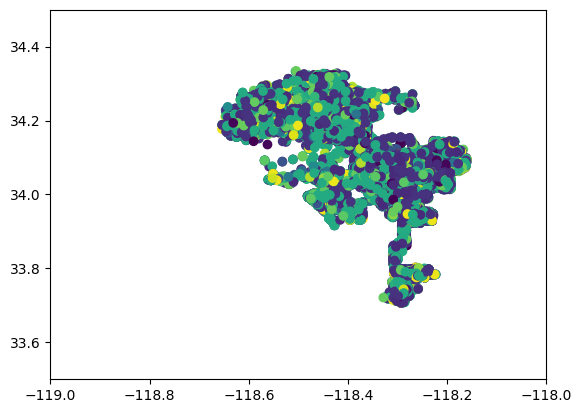

In [72]:
location = my_data[['Crm Cd','LAT','LON']]
plt.scatter(location['LON'],location['LAT'],c=location['Crm Cd'])
plt.ylim((33.5,34.5))
plt.xlim((-119,-118))

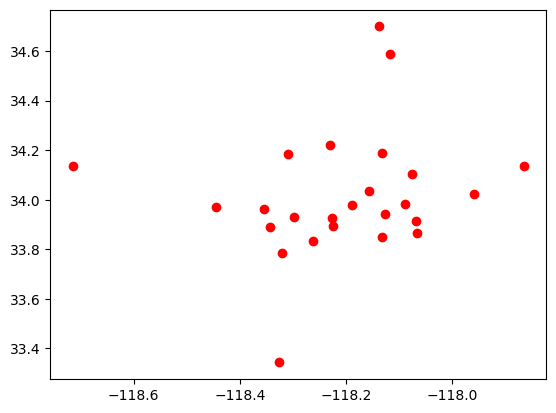

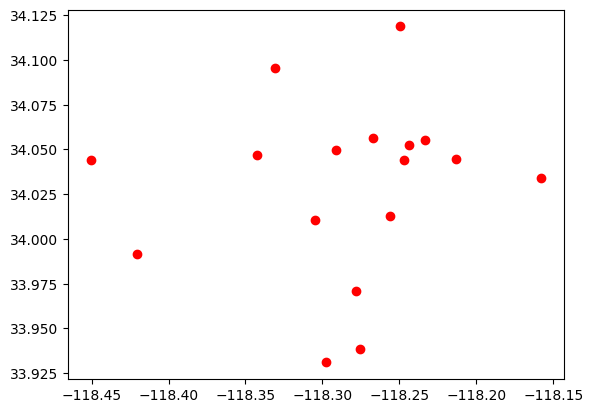

In [117]:
station_loc = pd.read_csv('Sheriff_and_Police_Stations.csv')
station_loc1 = station_loc[station_loc['org_name']=='LA County Sheriff']
station_loc2 = station_loc[station_loc['org_name']=='LA County']
all_loc = pd.concat((station_loc1,station_loc2))
real_loc = all_loc[['latitude','longitude']]
plt.scatter(real_loc['longitude'],real_loc['latitude'],color='red',label='Real Location')
plt.show()

station_loc = pd.read_csv('Sheriff_and_Police_Stations.csv')
station_loc1 = station_loc[station_loc['city']=='Los Angeles']
real_loc = station_loc1[['latitude','longitude']]
plt.scatter(real_loc['longitude'],real_loc['latitude'],color='red',label='Real Location')
plt.show()
# real_loc = real_loc.values
# real_loc

In [121]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, normalize=False, p=2):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
        """
        self.n_clusters = n_clusters #initialize everything
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize        # This is for Problem 3.
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        #set our centers and then normalize if we need to 
        self.centers = X[np.random.choice(X.shape[0],self.n_clusters,replace=False)]
        if self.normalize == True:
            self.centers = np.reshape(self.centers/np.linalg.norm(self.centers,axis=1),(-1,1))
        for i in range(0,self.max_iter): #iterate thorugh max iter and create the label and new center
                label = np.argmin(np.linalg.norm(X[:,np.newaxis]-self.centers,ord=self.p,axis=2),axis=1)
                new_c = np.array([X[label==z].mean(axis=0) for z in range(self.n_clusters)])
                if np.linalg.norm(new_c-self.centers,ord=self.p) <self.tol: #if error is less than tol break
                     break
                self.centers = new_c #set the new center and normalize 
                if self.normalize == True:
                    self.centers = np.reshape(self.centers/np.linalg.norm(self.centers,axis=1),(-1,1))
        return self #return it 
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters for each entry of X.
        """
        my_dist = np.linalg.norm(X[:,np.newaxis]-self.centers,ord=self.p,axis=2) #make our distance and return the argmin of it
        return np.argmin(my_dist,axis=1)
    
    def fit_predict(self, X):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)
    
    def plot(self, X, y):
        """Plot each of the data points, colored by cluster.
        Plot each of the cluster centers using a different marker.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data being clustered.
            y ((n_samples) ndarray): the labels for each of the samples.
        """
        
        #plot the points and then the centers and label everything
        plt.scatter(X[:,0],X[:,1],c=y)
        plt.scatter(self.centers[:,0],self.centers[:,1],marker='+',color='black',label='Optimal Location')
        plt.scatter(real_loc['longitude'],real_loc['latitude'],marker='+',color='red',label='Real Location')
        plt.legend()
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Police Station Locations in LA County')
        plt.show()

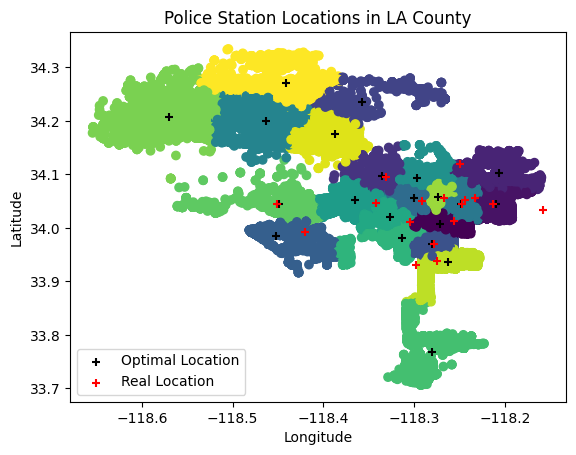

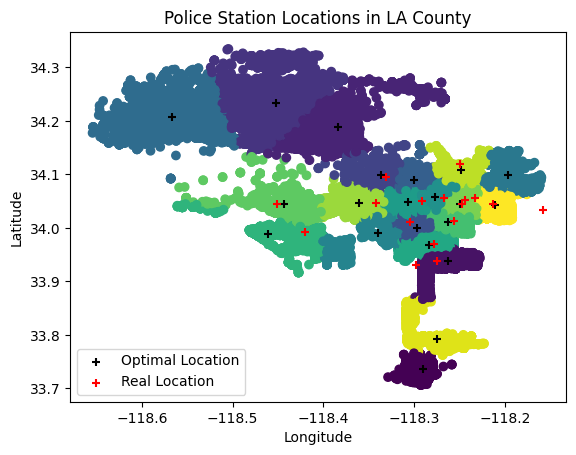

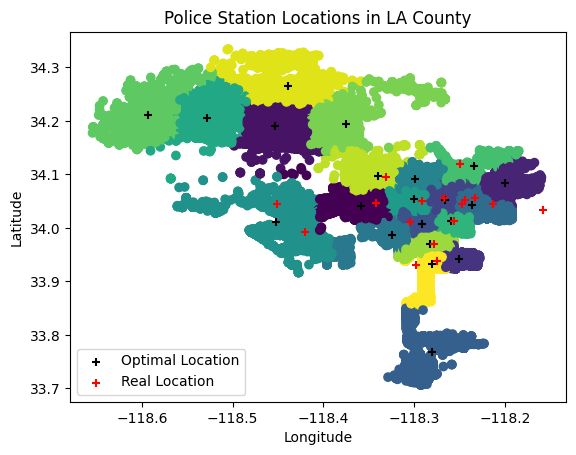

In [122]:
location = my_data[['LON','LAT']]
# new_data = location.values
# new_data = location
new_loc = location[~(location == 0).all(axis=1)]
# print(location)
new_data = new_loc[['LON','LAT']].values
# print(new_data)
for x in [1,2,np.inf]: #iterate through our different norms 
    km = KMeans(n_clusters=21,p=x) #initialize our class, fit it and then predict and plot it 
    km.fit(new_data)
    y = km.predict(new_data)
    km.plot(new_data,y)

In [89]:
# print(new_loc.equals(test[['LON','LAT']]))

In [87]:
# new_loc

In [88]:
# test[['LON','LAT']]

In [105]:
# station_loc = pd.read_csv('Sheriff_and_Police_Stations.csv')
# station_loc1 = station_loc[station_loc['org_name']=='LA County Sheriff']
# station_loc2 = station_loc[station_loc['org_name']=='LA County']
# all_loc = pd.concat((station_loc1,station_loc2))
# real_loc = all_loc[['latitude','longitude']]
# real_loc = real_loc.values
# # real_loc

# Abstract
# new 
The year 2020 was a very interesting year for much of society. It market the spread of the first global pandameic in decades and also was accompanied by higher rates of crime in many large cities. The US government data site since then has published a dataset that includes over 800k reported insidents of crime in LA. We seek to better understand some of the patterns in crime from this dataset. We have two main goals that we try to better understand while also discussing the ethical implication of our work. First, in law enforcement recourses are nearly always limited. Due to this we investigate where current police stations are and compare them to potential police locations that are optimized based on crime occurance. We also seek to understand and see how machine learning models are able to predict crime based on attributes of the crime (this includes considering weapon used, where the crime took place, if the crime was indoors or outdoors, etc.). Both of these goals have practical and ethical implications that we will address later in the paper. 
# old 
We investigate ensemble learning methods, specifically random forests and boosted trees, to classify crime types utilizing data on incidents reported in Los Angeles County during the year 2020. The primary objective is to develop machine learning models capable of accurately predicting crime classifications based on various features associated with the reported incidents. Using data encompassing different attributes such as location, time, and other relevant factors, we aim to find relationships between these variables to enhance the classification accuracy of criminal activities. We seek to understand the ideal location for police stations in the LA country based on the occurence and frequency of crime. We then compare this to the actual location of LA police stations to understand where the city could place future stations. We also seek to achieve an enhanced understanding of crime patterns, enabling law enforcement agencies to improve resource allocation and planning responses. The findings and insights derived from paper hold the potential to contribute to the field of crime analysis and facilitate more efficient measures for aiding victims within Los Angeles County and beyond. 

# Introduction
# new
First and foremost, exploring relationships in crime and potential police station locations with machine learning can be very cumbersome and difficult. The space is rideled with ethical implications. We seek to comment on some of the main ethics-related topics at the end of our paper, but want to clarify that we do not seek to profile or enact change based on our findings. Rather we seek to learn more about crime in LA and recommend any findings be studied at a much greater depth with caution. 

LA county has been an area, like many large cities, that struggle with crime. Our first goal is to understand potential locations for police stations. This finding could help LA county understand what parts of the city could use a police station that do not have one. It could help the county choose potential lcoations for future stations as it grows and expands. Having police stations well-distributed throughout the city could improve first responder time and overall safety. Our second goal, is to see how well machine learning models can predict what type of crime occurred based on attributes of the crime. When first responders are dispatched to a crime scene different resources are sent. Being able to predict more about what kind of crime occurred with only having limited information about the crime could improve more efficient resource allocation. These are the two goals that we seek to learn more about in our paper. We again acknowldge many ethical implications of this project and will address them in detail at the end of the paper.  To analyze and understand these questions we will first clean the data. We will also then look at some algorithms like kmeans, random forests, boosted forests and logistic regression to help us further understand crime classification. 


# old
Los Angeles County has long been grappling with concerns surrounding its high crime rates. There is a wide variety of forms of criminal activities ranging from property crimes to violent offenses. Combatting this has been a consistent effort within the community and among law enforcement. While existing programs and resources offer support and aid to victims of many crimes, the efficiency of these could be greatly enhanced. Nationwide, many crime resources are in high demand, while others are going unused. The current system, though commendable, faces limitations in its ability to cater to the complex needs of crime victims. There exists a gap in the optimization of these programs, suggesting opportunities for improvement in their responses to distress calls and the following services. Enhancing these systems could better address the diverse needs and circumstances of victims, ensuring more effective aid and facilitating their path towards recovery and rehabilitation.

One way to improve these support systems is by analyzing crime data more systematically. By identifying trends and patterns in this data, it becomes possible to pinpoint areas with higher risks of certain crimes. This information can help in onsite assistance and emergency responses. It can also be used directing the county's resources, money, and services more strategically, making sure they're better suited to the specific needs of people and communities most impacted by crime. Using data from the crimes in LA county that were reported in 2020, we can create machine learning models to predict which areas of the county correlate to which crimes, assisting in the distribution of help resources. This also will help us understand where future police stations could be located. To analyze and understand these questions and potential we will first clean the data. We will also then look at some algorithms like kmeans, random forests, boosted forests and logistic regression to help us further understand crime classification. 